## Installing libraries

In [ ]:
!pip install mplfinance
!pip install trendln --upgrade --no-cache-dir
!pip install yfinance
!pip install pandas
!pip install numpy
!pip install ta
!pip install matplotlib
!pip install seaborn
!pip install googlenews

## Import libreries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import datetime as dt
import matplotlib.gridspec as gs
import matplotlib.pyplot as plt
from GoogleNews import GoogleNews
sns.set()
%matplotlib inline

from taAnalysis import taAnalysis
from performance import performance, corr
from fearGreed import fearGreed
from onChain import OnChain
from draw import draw_vs_btc

## Setting parameters

In [4]:
asset = "BTC-USD"

#keyword for news research
keyword = "bitcoin"

#take it from glassnode
glassnode_skey = 'INSERT SECRET KEY HERE'

# Range used to download datas. 
start = dt.date(2016, 1, 1)

# Range used to plot the technical analysis chart. Support & resistance are identified by this range
start_date_plot = dt.date(2021, 1, 1)

end = dt.date.today()
end_date_plot = dt.date.today()

## Technical analysis

[*********************100%***********************]  1 of 1 completed


/Users/valeriomellini/source-code/bitcoin-dashboard/venv/lib/python3.8/site-packages/ta/trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/Users/valeriomellini/source-code/bitcoin-dashboard/venv/lib/python3.8/site-packages/ta/trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
/Users/valeriomellini/source-code/bitcoin-dashboard/venv/lib/python3.8/site-packages/ta/trend.py:938: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._psar_up = pd.Series(index=self._psar.index)
/Users/valeriomellini/source-code/bitcoin-dashboard/venv/lib/python3.8/site-packages/ta/trend.py:939: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._ps

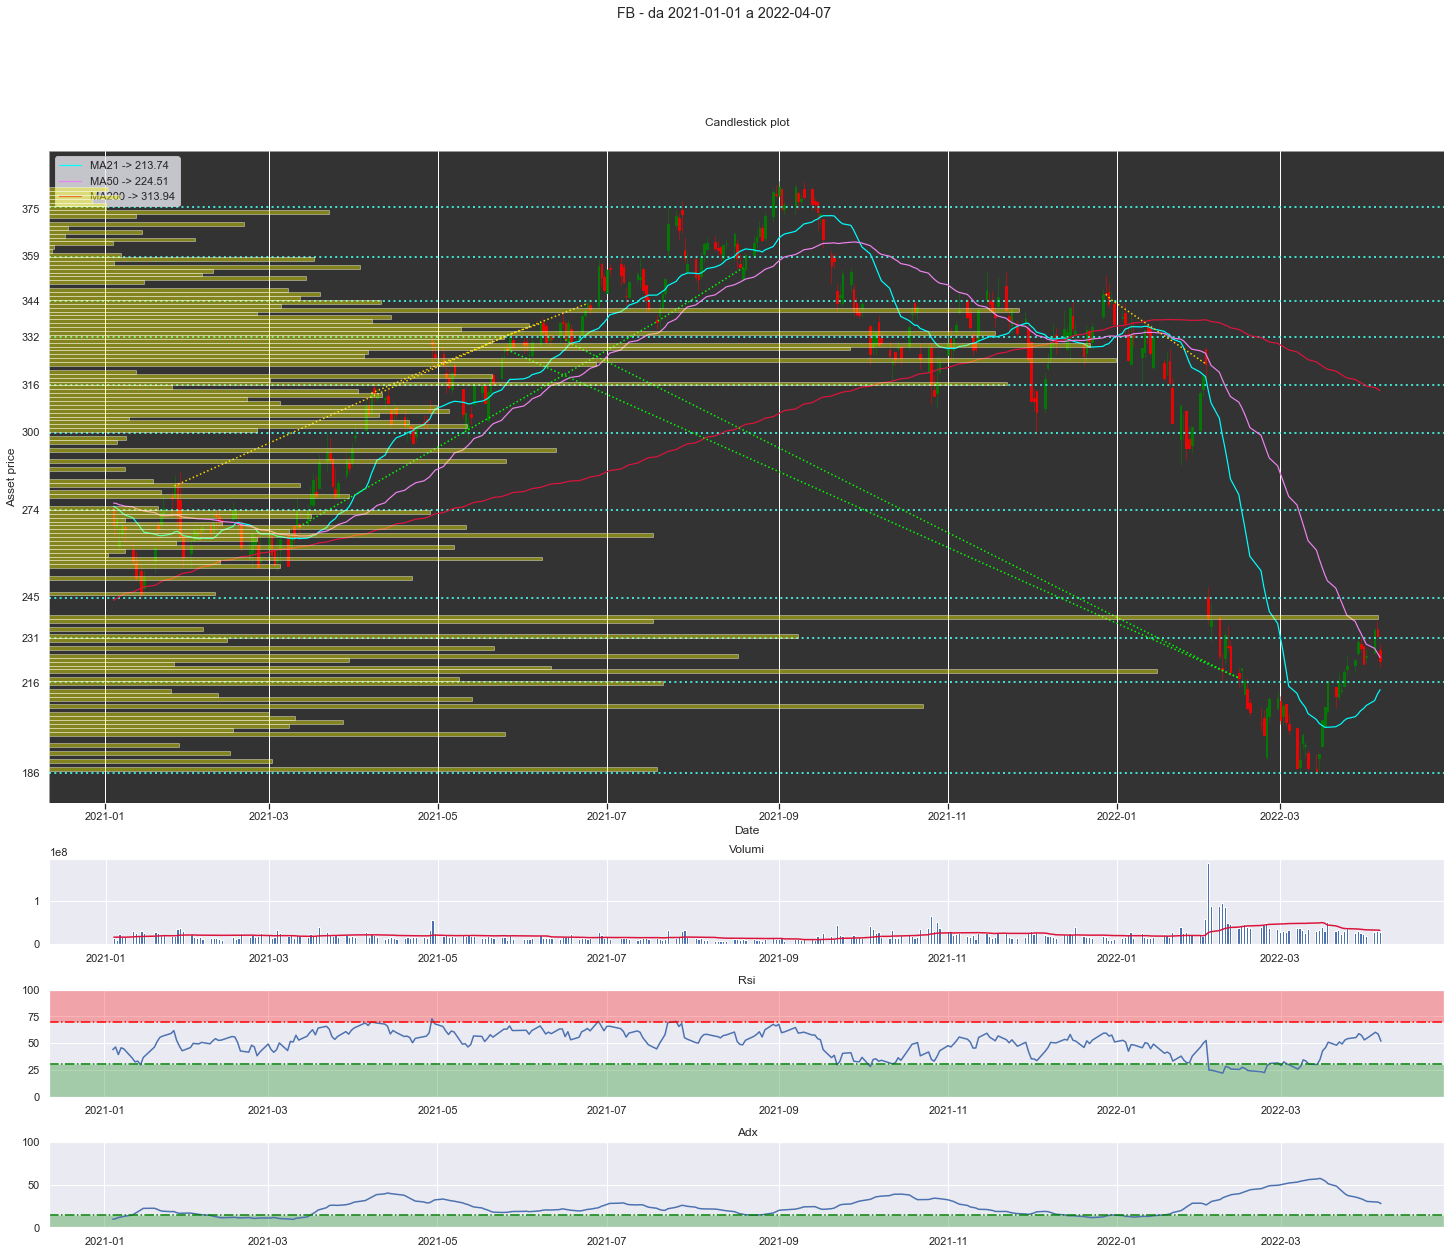

In [5]:
ta = taAnalysis(asset, start_date = start, start_plot_date = start_date_plot)
ta.download_data()
ta.set_levels()
btc_usd_df = ta.get_data()
ta.plot_all()

## Btc perfomance & correlations

In [ ]:
ris = performance(btc_usd_df)
ris.plot(kind='bar', 
         title='{0} current price compared to 356, 180, 90, 21, 7 days ago'.format(asset), 
         legend = False,
         figsize=(16,5))

In [ ]:
sp500 = yf.download('^GSPC', start=start, end=dt.date.today())
ris = corr(btc_usd_df, sp500, [730, 356, 180, 90, 30])
ax = ris.plot(kind='bar', 
         title='Correlation between {} S&P500'.format(asset), 
         figsize=(16,5),
         ylim=([-1,1]),
         legend=False)

In [ ]:
gold = yf.download('IAU', start=start, end=dt.date.today())
ris = corr(btc_usd_df, gold, [730, 356, 180, 90, 30])
print (ris)
ris.plot(kind='bar', 
         title='Correlation between {} and Gold'.format(asset), 
         figsize=(16,5),
         ylim=([-1,1]),
         legend = False)

# Fears & Greed

In [ ]:
fng = fearGreed()
fng.downloadData(limit=365)
fng.plot_all(btc_usd_df)
fng_data = fng.getData()

print ('Fear & greed index TODAY {} value: {} - {}'.format(fng_data.index[0], 
                                                          fng_data.iloc[0]['value'],
                                                          fng_data.iloc[0]['value_classification']))
print ('Fear & greed index WEEK AGO {} value: {} - {}'.format(fng_data.index[7], 
                                                          fng_data.iloc[7]['value'],
                                                          fng_data.iloc[7]['value_classification']))
print ('Fear & greed index MONTH AGO {} value: {} - {}'.format(fng_data.index[31], 
                                                          fng_data.iloc[31]['value'],
                                                          fng_data.iloc[31]['value_classification']))

#### BTC-USD vs CBOE Volatility Index

In [ ]:
vix_df = yf.download('^VIX', start=start, end=dt.date.today())
vix_df.rename(columns={'Open':'Value'}, inplace=True)    
draw_vs_btc(btc_usd_df[['Close']], vix_df[['Value']], 'CBOE Volatility Index')   

# Analysis on chain 
To use these cells you'll need an API key from [Glassnode](https://glassnode.com/)

In [ ]:
onchain = OnChain(glassnode_skey)
onchain.download_datasets()

#### Hashrate vs btc price

In [ ]:
onchain.plot_hashrate(btc_usd_df)

#### Exchanges distribution vs btc price

In [ ]:
onchain.plot_exchange_distribution(btc_usd_df)

# BTC news

In [ ]:
googlenews = GoogleNews()
googlenews = GoogleNews(lang='en', region='US')
googlenews = GoogleNews(period='7d')
googlenews.search(keyword)
googlenews.get_page(10)
res = googlenews.results()
count = 1
for i in res:
    print('****NEWS Nro {}****\n'.format(count))
    print('**** {0} ****\n'.format(i['title']))
    print('{0}\n'.format(i['desc']))
    print('{0}\n'.format(i['link']))
    print('{0}\n'.format(i['date']))
    print('------------------------------------------\n\n')
    count = count + 1